# Cahier de TP Antonin Riguet & Neil Perlerin

# TP 1 : Lois de Snell-Descartes

## 1.1 Mesure de l'indice optique du plexiglas

### 1. Expérience

Schéma de l'éxpérience + protocole :

- On positionne le laser, la lentille et le milieu à mesurer en ligne droite
- On s'assure que le laser fait contact avec le milieu au centre du demi-cercle
- On choisit un angle d'incidence non nul
- On mesure l'angle d'incidence et l'angle refracté
- On utilise la loi de Snell-Descartes pour trouver l'indice de réfraction du plexiglas

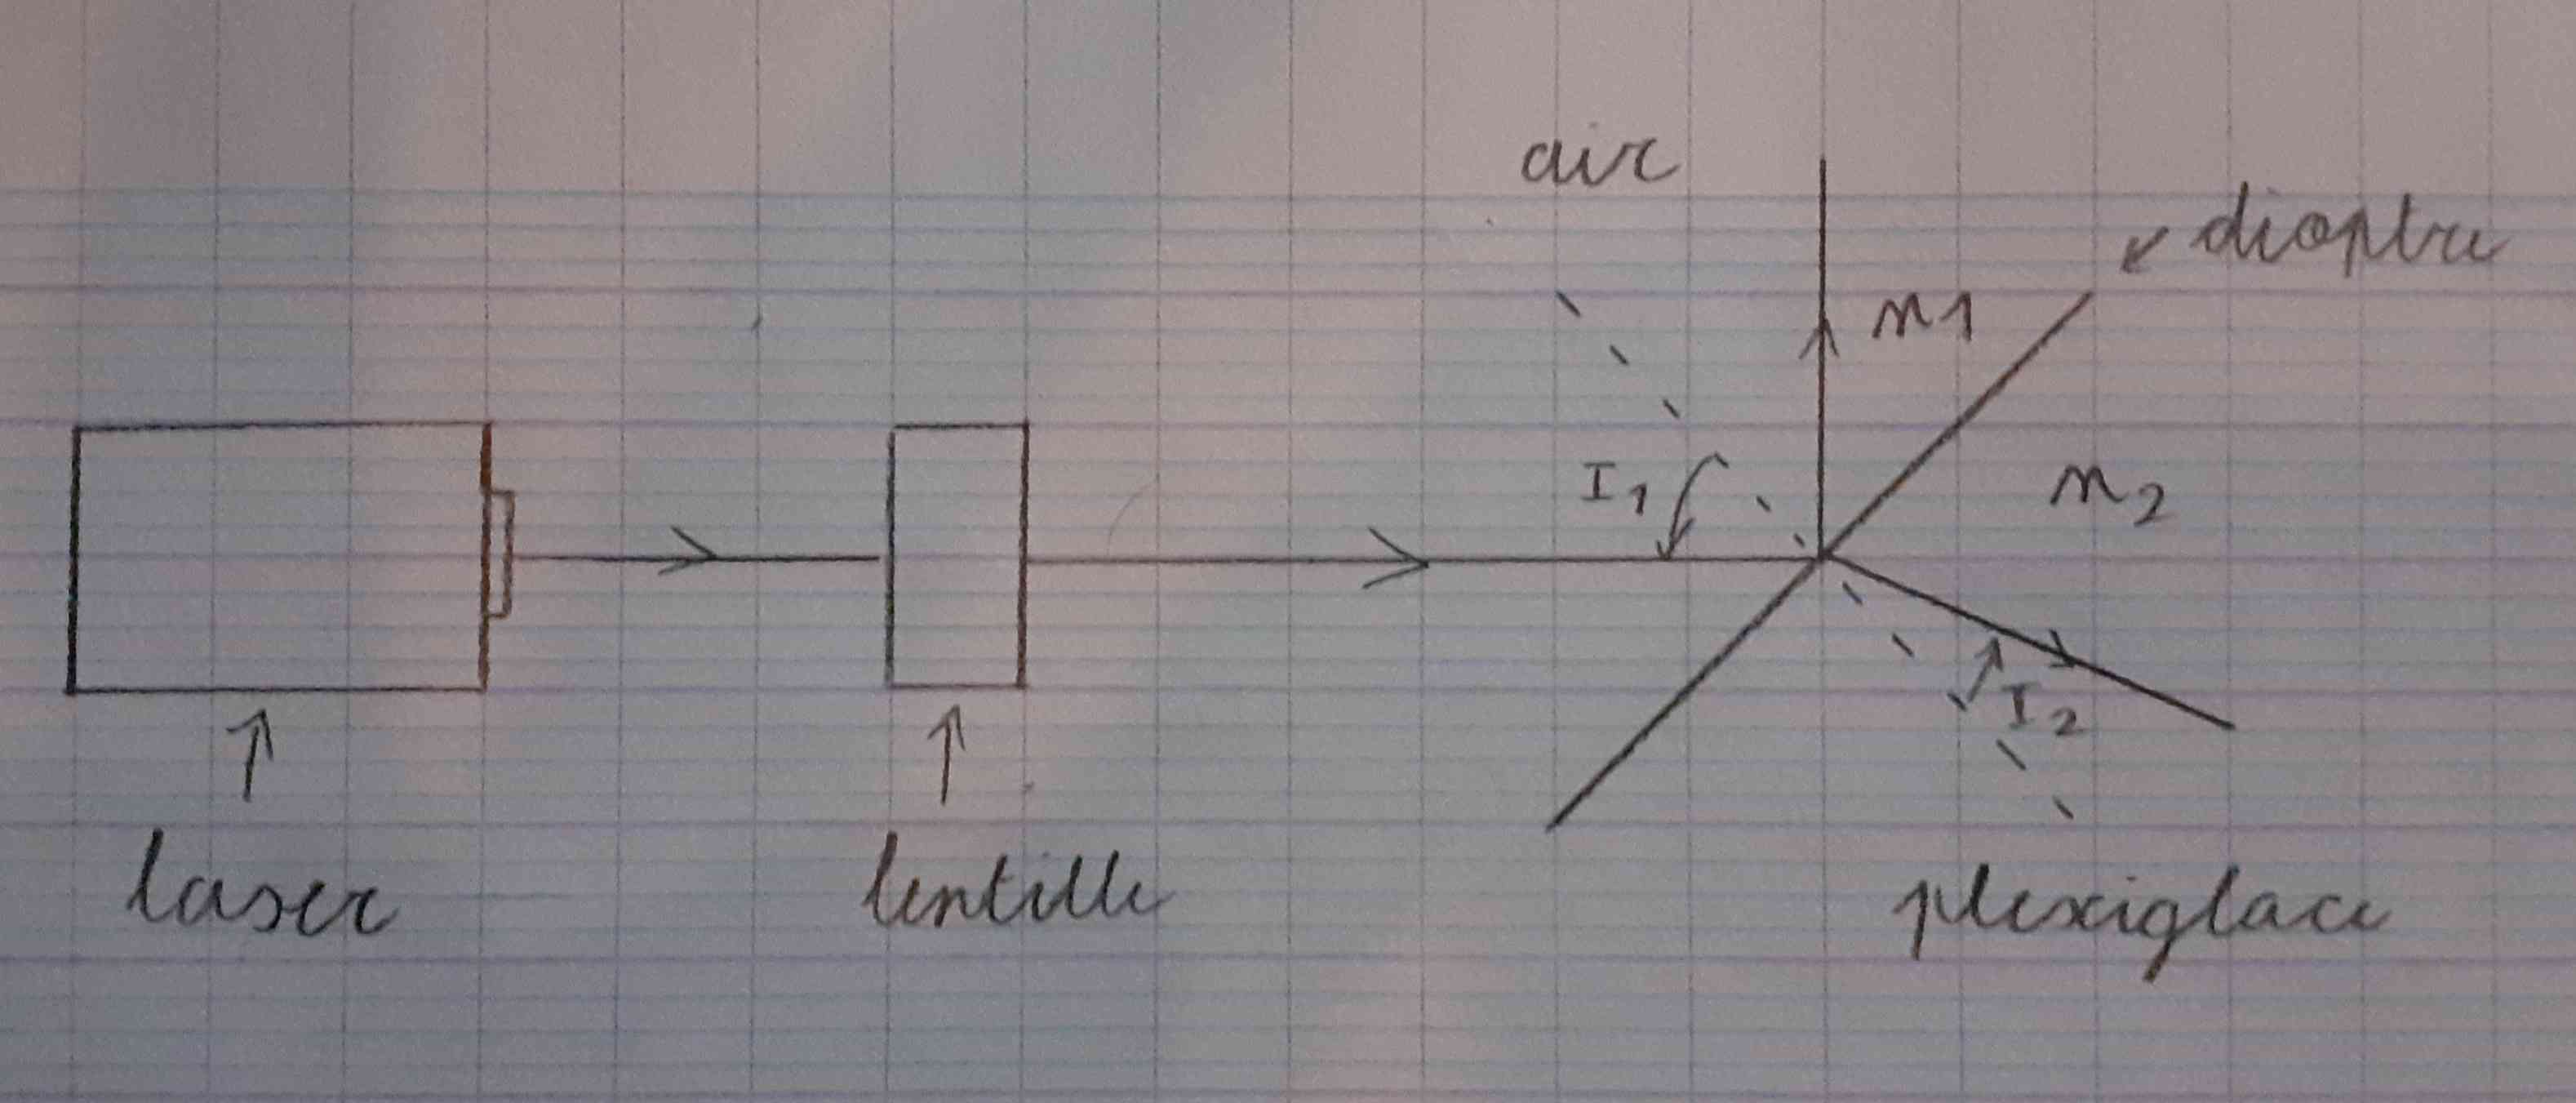

### 2. Traitement de données

In [ ]:
import math

def calculer_indice(i1, i2) : # Fonction pour calculer la donnée désirée d'après les deux angles
    return math.sin(math.radians(i1))/math.sin(math.radians(i2))

print(calculer_indice(70, 38.5))

In [26]:
import numpy as np

n=np.array([1.50, 1.46, 1.54, 1.52, 1.51]) # Ensemble des données

nmoy=np.mean(n) # Moyenne
u_n=np.std(n, ddof=1)/np.sqrt(len(n)) # Incertitude

print(f'n= {nmoy:.3e} +/- {u_n:.1e} unité')

n= 1.506e+00 +/- 1.3e-02 unité


### 3. Conclusions

Valeur tabulée = 1.51

In [30]:
E = abs(nmoy - 1.51)/math.sqrt(u_n**2 + 0)
print(f'E = {E}')

E = 0.3015113445777804


On a E<2 donc la valeur mesurée est en accord avec la valeur tabulée

## 1.3 Phénomène de réflexion totale

### 1. Expérience

Schéma de l'éxpérience + protocole :

- On positionne le laser, la lentille et le milieu à mesurer en ligne droite
- On s'assure que le laser fait contact avec le milieu au centre du demi-cercle, en passant d'abord par la partie arrondie du demi-cercle
- On fait tourner le disque jusqu'à ce que la réfraction se transforme en réflexion totale
- On mesure l'angle donné sur le disque

### 2. Traitement de données

In [3]:
def calculer_indice(il) : # Fonction pour calculer la donnée désirée d'après l'angle
    return 1/math.sin(il)

print(calculer_indice(43)) # C'est pas bon. Faut utiliser le cours pour trouver

1.2022485761466757


In [26]:
n=np.array([43, 42.5]) # Ensemble des données

nmoy=np.mean(n) # Moyenne
u_n=np.std(n, ddof=1)/np.sqrt(len(n)) # Incertitude

print(f'n= {nmoy:.3e} +/- {u_n:.1e} unité')

n= 1.506e+00 +/- 1.3e-02 unité


### 3. Conclusions

## 1.2 Vérification des lois de Snell-Descartes

In [35]:
#Bibliothèques
import numpy as np
import matplotlib.pyplot as plt

In [45]:
n=np.array([35.5, 34.5, 35, 34.5, 34, 34]) # Ensemble des valeurs de i2

nmoy=np.mean(n) # Moyenne
u_n=np.std(n, ddof=1)/np.sqrt(len(n)) # Incertitude

print(f'n= {nmoy:.3e} +/- {u_n:.1e} unité')

n= 3.458e+01 +/- 2.4e-01 unité


In [100]:
y = np.array([10, 20, 30, 40, 50, 60]) 
y = np.sin(y*np.pi/180)

u_y = 0

x = np.array([7.25, 13.21, 20, 25.33, 30.50, 34.58])
x = np.sin(x*np.pi/180)

u_x = np.array([0.28, 0.23, 0.28, 0.21, 0.22, 0.24])#incertitudes des angles
u_x = u_x*np.pi/180*np.cos(x*np.pi/180)#incertitudes des sinus

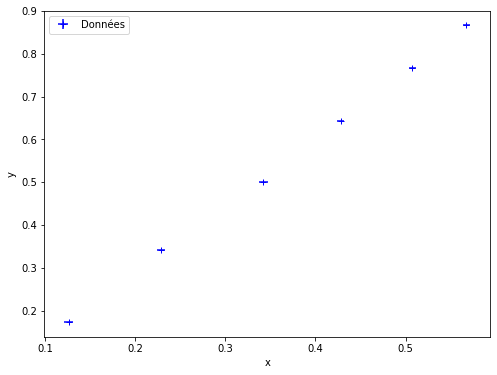

In [101]:
#Tracé des données avec les barres d'erreur
plt.figure(figsize=(8,6))
plt.xlabel('x')
plt.ylabel('y')

plt.errorbar(x, y, xerr=u_x ,yerr=u_y,fmt='b+',zorder=2,label='Données')
plt.legend()
plt.show()

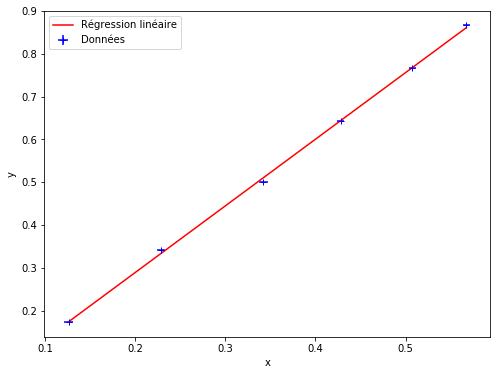

In [102]:
#Ajustement des données par une fonction affine
p = np.polyfit(x,y,1)
a=p[0] #pente de la droite d'ajustement
b=p[1] #ordonnée à l'origine de la droite d'ajustement

#Tracé des données avec la droite d'ajustement
plt.figure(figsize=(8,6))
plt.xlabel('x')
plt.ylabel('y')

xfit=np.linspace(min(x),max(x),2)

plt.plot(xfit, b + a*xfit, 'r', label='Régression linéaire')
plt.errorbar(x, y,xerr=u_x ,yerr=u_y,fmt='b+',zorder=2,label='Données')
plt.legend()
plt.show()

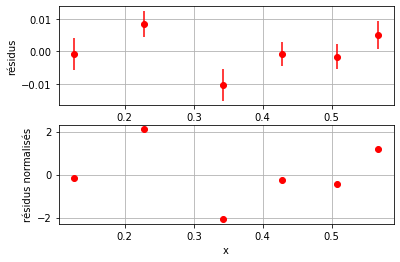

In [109]:
#Vérification de la validité de la régression linéaire avec les résidus
plt.subplot(211)
res=(y-np.polyval(p,x))       #Résidus
plt.plot(x,res,'ro')           #Tracé des résidus
plt.errorbar(x, res,yerr=u_x,fmt='r+',zorder=2,label='Mesures')
plt.grid(True)
plt.ylabel('résidus')
plt.xlabel('x')
plt.subplot(212)
z=(y-np.polyval(p,x))/u_x    #Résidus normalisés
plt.plot(x,z,'ro')             #Tracé des résidus normalisés, |z| reste <2 donc la régression linéaire est validée
plt.grid(True)
plt.ylabel('résidus normalisés')
plt.xlabel('x')
plt.show()

#1. sur les résidus : la valeur 0 est bien dans les barres d'erreurs -> ajustement validé
#2. sur les résidus normalisés : z<2 pour tous les points -> ajustement validé

In [112]:
# Détermination des incertitudes sur les paramètres de modélisation par méthode Monte-Carlo
N = 1000

ta = [] # liste qui contiendra les valeurs de pente
tb = [] # liste qui contiendra les valeurs d'ordonnée à l'origine


for i in range(0,N):
    l = len(x) 
    my = y + u_y * np.sqrt(3) * np.random.uniform(-1, 1, l) # le sqrt(3) vient du fait qu'on prend une distribution uniforme sur la graduation de y / tirage de y
    mx = x + u_x * np.sqrt(3) * np.random.uniform(-1, 1, l) # le sqrt(3) vient du fait qu'on prend une distribution uniforme sur la graduation de x / tirage de x
    p_MC = np.polyfit(mx, my, 1) # Ajustement après tirage aléatoire en chaque point
    ta.append(p_MC[0]) 
    tb.append(p_MC[1])

u_a = np.std(ta, ddof = 1) # incertitude sur la pente
u_b = np.std(tb, ddof = 1) # incertitude sur l'ordonnée à l'origine

print('a= {:.3e} +/- {:.1e} unité'.format(a,u_a),'et b={:.3e} +/- {:.1e} unité'.format(b,u_b))

a= 1.556e+00 +/- 1.9e-02 unité et b=-2.190e-02 +/- 7.7e-03 unité


In [113]:
print(f"a = {abs(a - 1.51)/u_a}, b = {abs(b)/u_b}") 

a = 2.4364525102763617, b = 2.8476162853416236


### Conclusion

Le modèle marche approximativement, a et b sont proches de 2. (Sans doute à cause d'un défaut d'application des procédures expérimentales)